In [1]:
import torch
import numpy as np
from torch.nn import functional as F
from disvae.models.vae import VAE
from disvae.models.losses import BtcvaeLoss
from collections import defaultdict
import matplotlib.pyplot as plt

device=torch.device('cpu' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
latent_dim = 3
cos_dim = 4
spec_dim = 18
n_data = 2048

params = np.load('./IllustrisTNG_params.npy')
times  = np.load('./IllustrisTNG_times.npy')
times = times[:, :, :, np.newaxis]
params = np.concatenate([params, times], axis=3)
params = params.transpose([0,2,1,3])
params  = torch.tensor(params.reshape([4096,2,4]))
train_params = params[:2048,:,:]
valid_params = params[2048:,:,:]

spec = np.load('./IllustrisTNG_powers.npy')
spec = spec[:,:2,:,:].transpose([0,2,1,3])
spec = torch.tensor(spec.reshape([4096,2,-1]))
spec[:,1,:] = spec[:,1,:]/spec[:,0,:]
spec[:,0] = np.log10(spec[:,0])
spec[:,1] = 10*np.log10(spec[:,1])
train_spec = spec[:2048,:,:]
valid_spec = spec[2048:,:,:]

t_set = torch.cat([train_spec,train_params],dim=2).to(device)
t_dataset = torch.utils.data.TensorDataset(t_set, t_set[:,1,:18])
t_loader = torch.utils.data.DataLoader(t_dataset, batch_size=256, shuffle=True)
    
v_set = torch.cat([valid_spec,valid_params],dim=2).to(device)
v_dataset = torch.utils.data.TensorDataset(v_set, v_set[:,1,:18])
v_loader = torch.utils.data.DataLoader(v_dataset, batch_size=2048, shuffle=False)

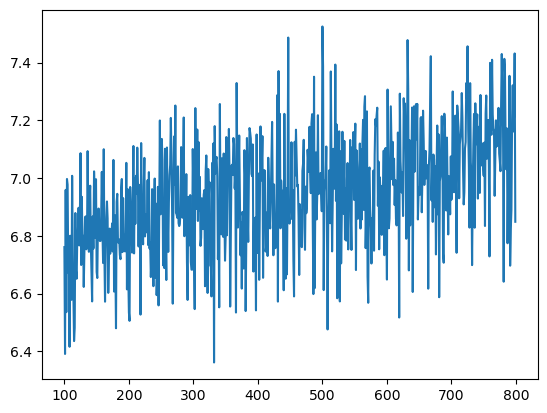

In [8]:
x = np.linspace(0,len(storer['loss'])-1,len(storer['loss']))
plt.plot(x[100:], storer['mi_loss'][100:])

In [3]:
model = torch.load('./models/VAE_test_1/VAE_test_1_83.pt').to('cpu')

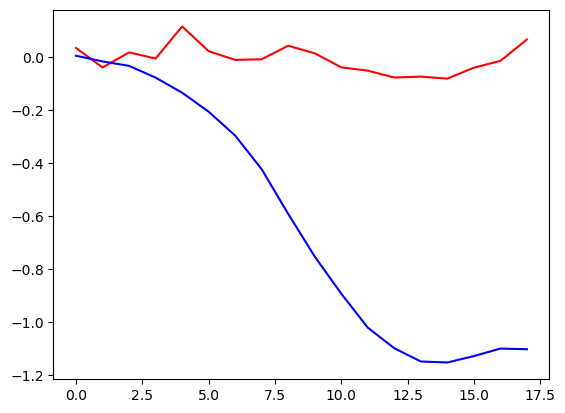

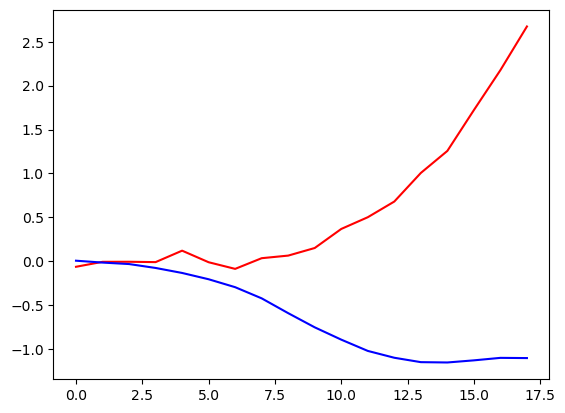

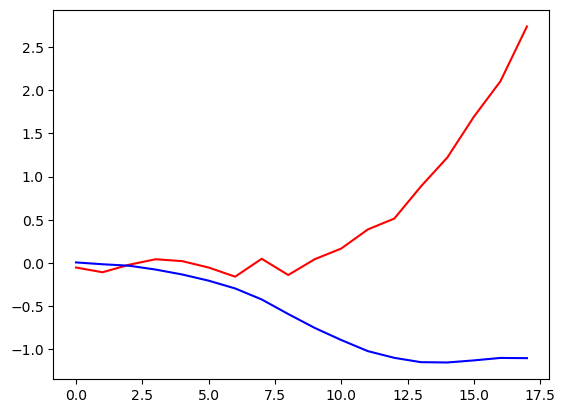

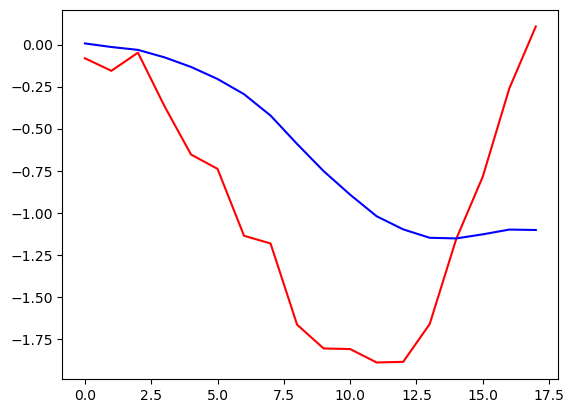

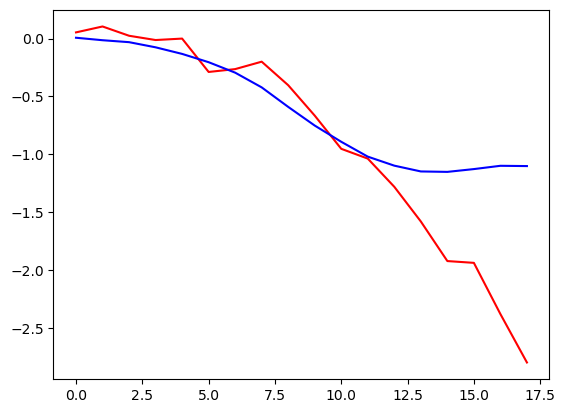

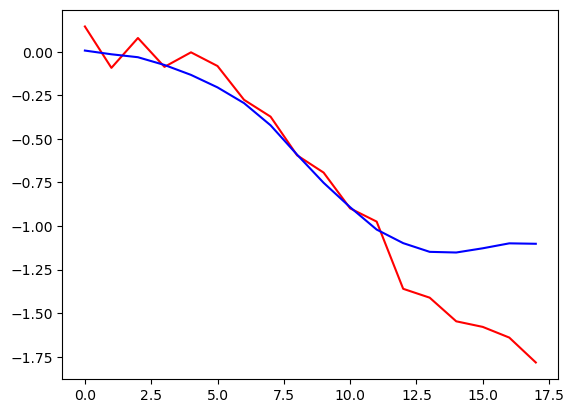

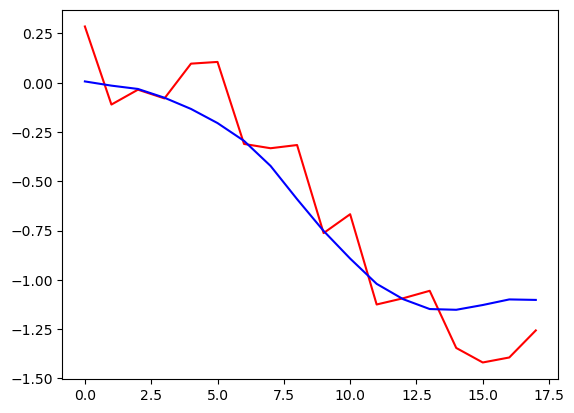

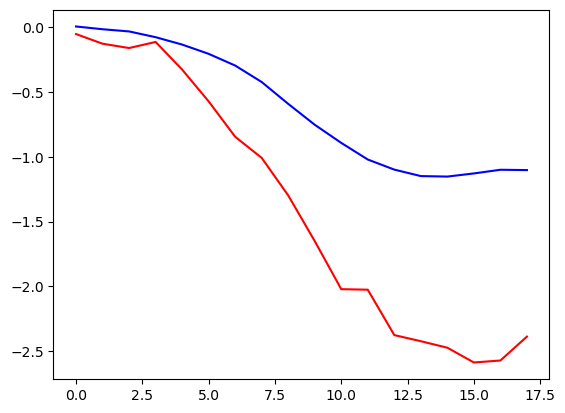

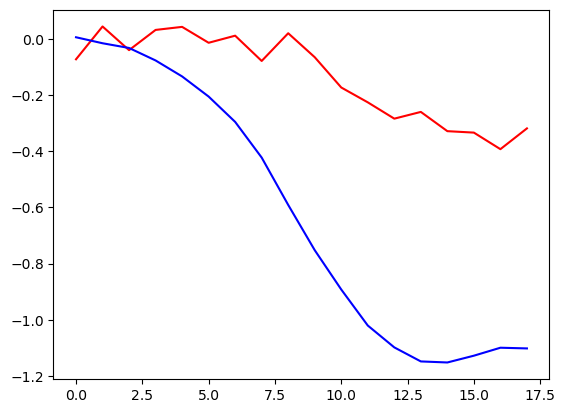

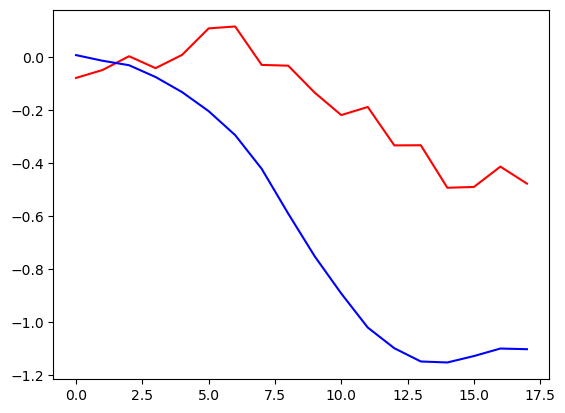

In [6]:
for index in range(20,30):
    for i in range(0,100):
        if not i:
            pred = model(t_set[index:(index+1)])[0].detach().numpy()
        else:
            pred+=model(t_set[index:(index+1)])[0].detach().numpy()
    pred = pred/100
    truth = spec[5:6,1].numpy()
    a = np.linspace(0,len(spec[5,0])-1,len(spec[5,0]))
    plt.plot(a, pred[0], color = 'red')
    plt.plot(a,truth[0],color='blue')
    plt.show()